<a href="https://colab.research.google.com/github/rajrawal/Data-Science-Projects/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Importing the dataset

In [2]:
ds=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preprocessing

In [3]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
ds['gender'].groupby(ds['gender']).count()

gender
Female    3488
Male      3555
Name: gender, dtype: int64

In [6]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
for i in ds.columns:
  group=ds[i].groupby(ds[i]).count()
  print(group)

customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64
gender
Female    3488
Male      3555
Name: gender, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: tenure, Length: 73, dtype: int64
PhoneService
No      682
Yes    6361
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: MultipleLines, dtype: int64
InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
No int

In [8]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'], errors='coerce')

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
ds.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
ds['TotalCharges']=ds['TotalCharges'].fillna(ds["TotalCharges"].mean())

In [12]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
ds.drop('customerID',axis="columns",inplace=True)

# Understanding the data set features through visualization

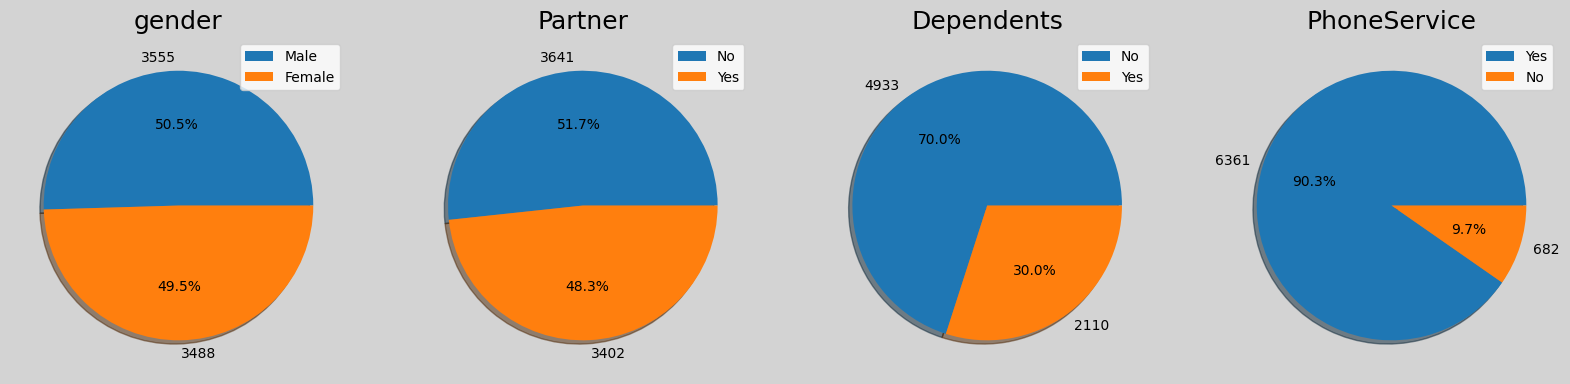

In [14]:
categ_columns = list(ds.select_dtypes(include = ['object']).columns)

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    d = ds[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

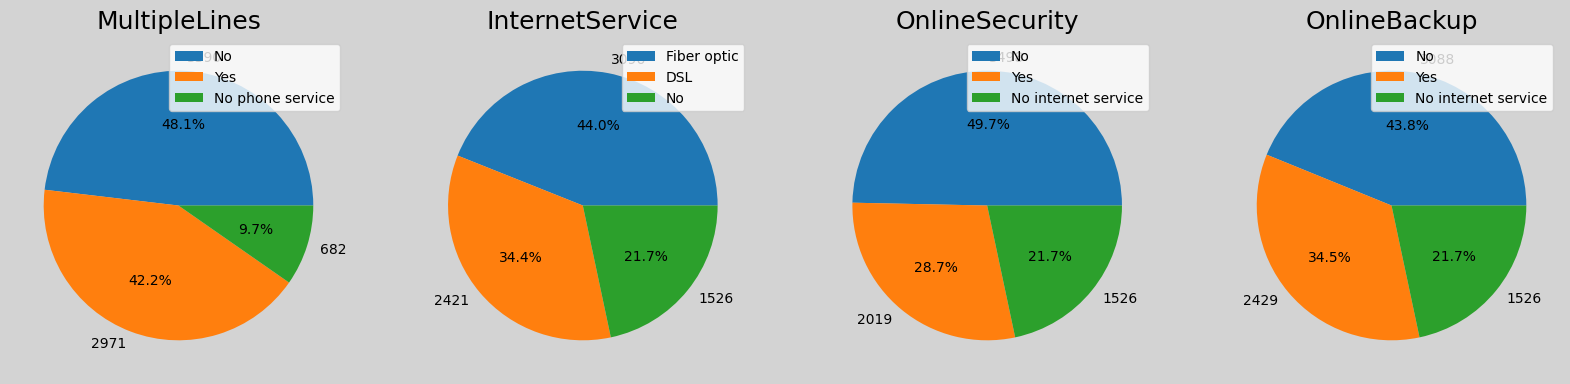

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")


for i, column in enumerate(categ_columns[4:8]):
    ax = axes[i]
    d = ds[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index,loc="best")

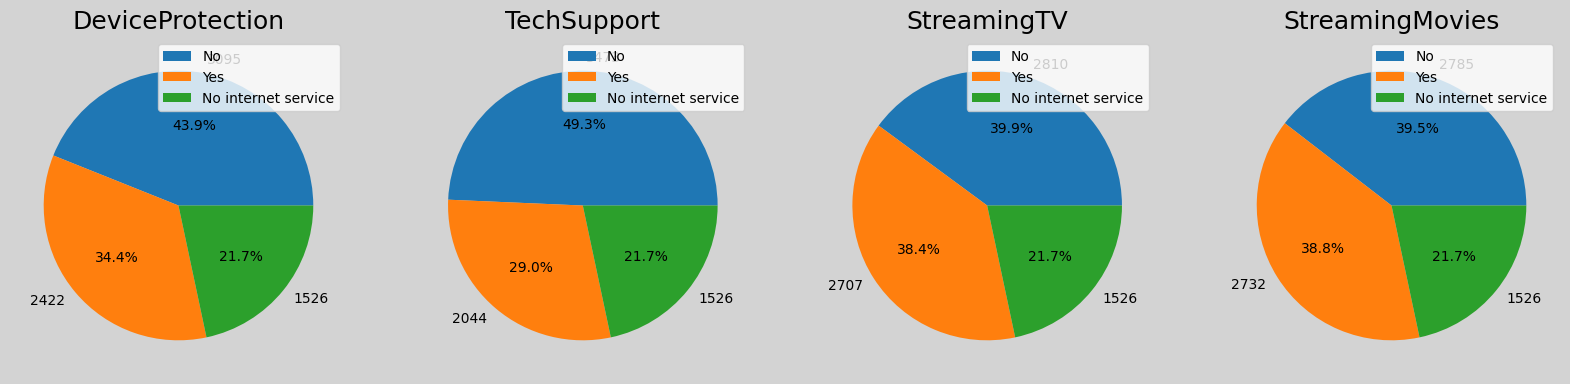

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[8:12]):
    ax = axes[i]
    d = ds[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index)


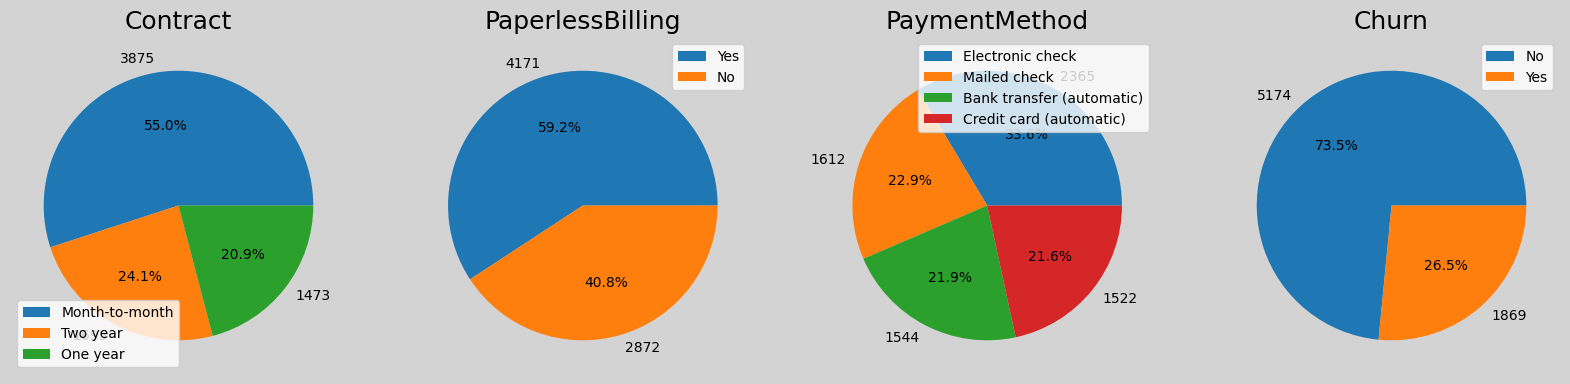

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[12:]):

        ax = axes[i]
        d = ds[column].value_counts()
        ax.pie(d, labels=d.values,autopct="%1.1f%%")
        ax.set_title(column,size=18)
        ax.legend(d.index)

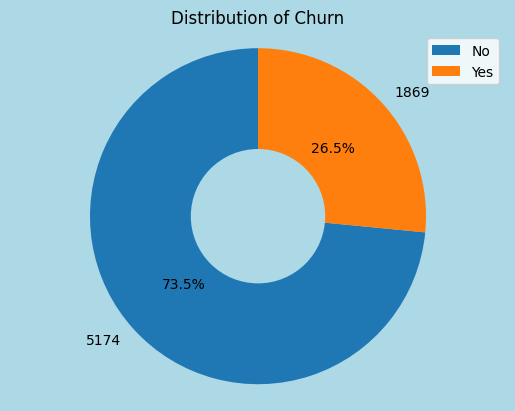

In [18]:
fig, ax = plt.subplots(facecolor="lightblue")
d = ds["Churn"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Distribution of Churn")
centre_circle = plt.Circle((0,0),0.4,fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

[Text(0.5, 0, 'Count')]

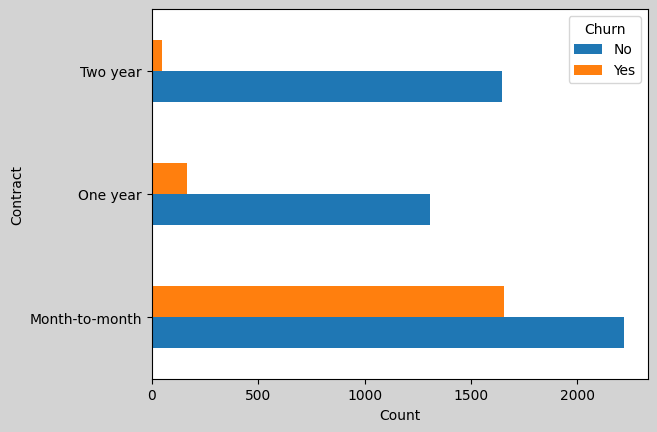

In [19]:
fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(ds["Contract"],ds["Churn"]).plot(kind="barh",ax=ax)
ax.set(xlabel="Count")

<Axes: xlabel='Churn', ylabel='tenure'>

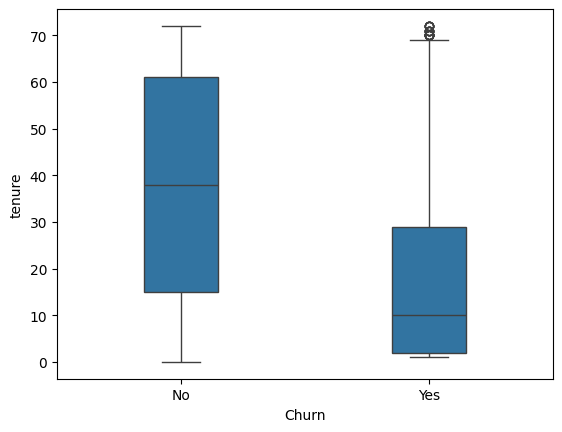

In [20]:
sns.boxplot(data=ds,x="Churn",y="tenure",width=0.3)

[Text(0.5, 0, 'Count')]

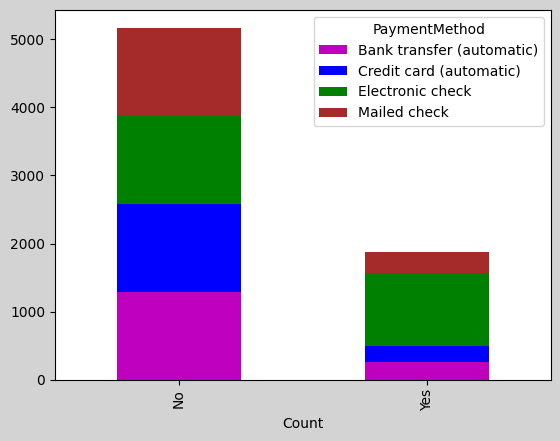

In [21]:
fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(ds["Churn"],ds["PaymentMethod"]).plot(kind="bar",color=["m","b","green","brown"],ax=ax,stacked=True,)
ax.set(xlabel="Count")

Text(0.5, 0.98, 'Distribution of TotalCharges')

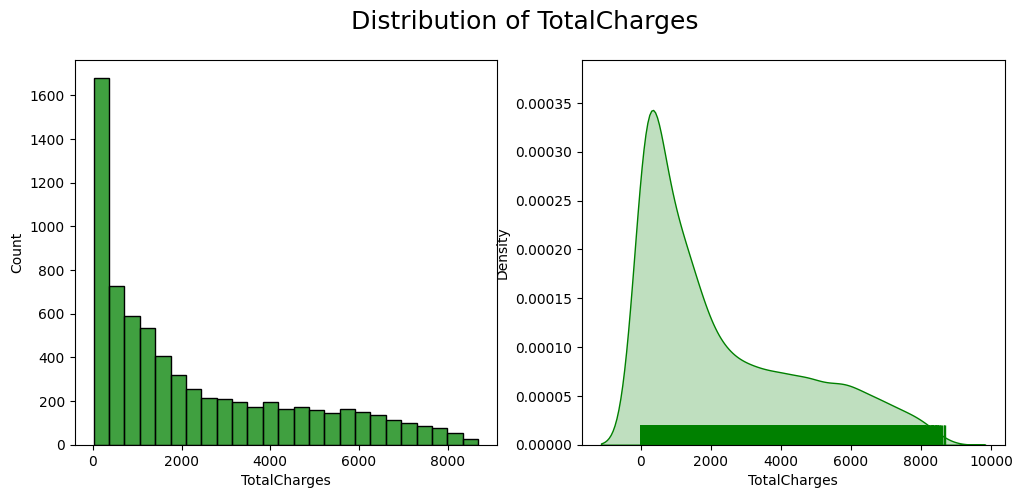

In [22]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(ds["TotalCharges"],ax=ax[0],color='Green')
sns.kdeplot(ds["TotalCharges"],fill=True,ax=ax[1],color='Green')
sns.rugplot(ds["TotalCharges"],height=0.05,color='Green')

fig.suptitle("Distribution of TotalCharges",size=18)

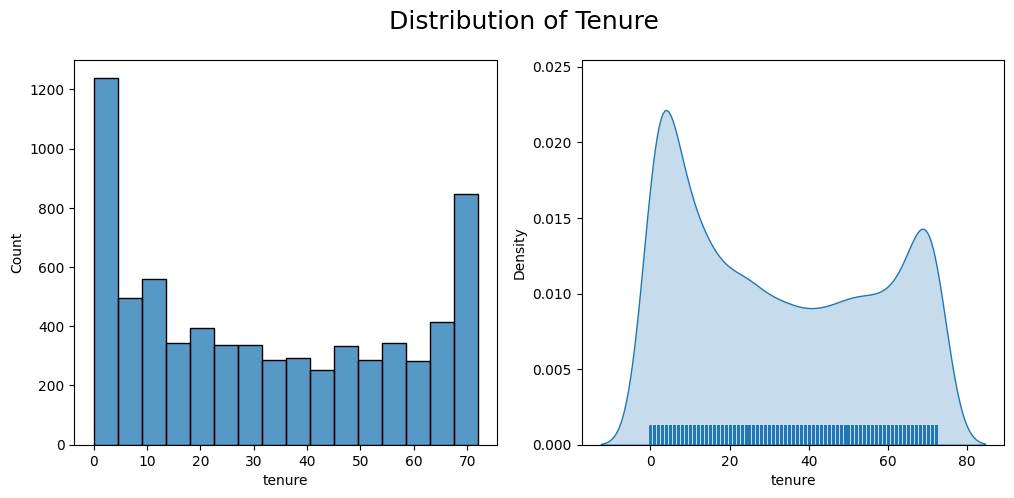

In [23]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(ds["tenure"],ax=ax[0])
sns.kdeplot(ds["tenure"],fill=True,ax=ax[1])
sns.rugplot(ds["tenure"],height=0.05)

fig.suptitle("Distribution of Tenure",size=18);

Text(0.5, 0.98, 'Distribution of MonthlyCharges')

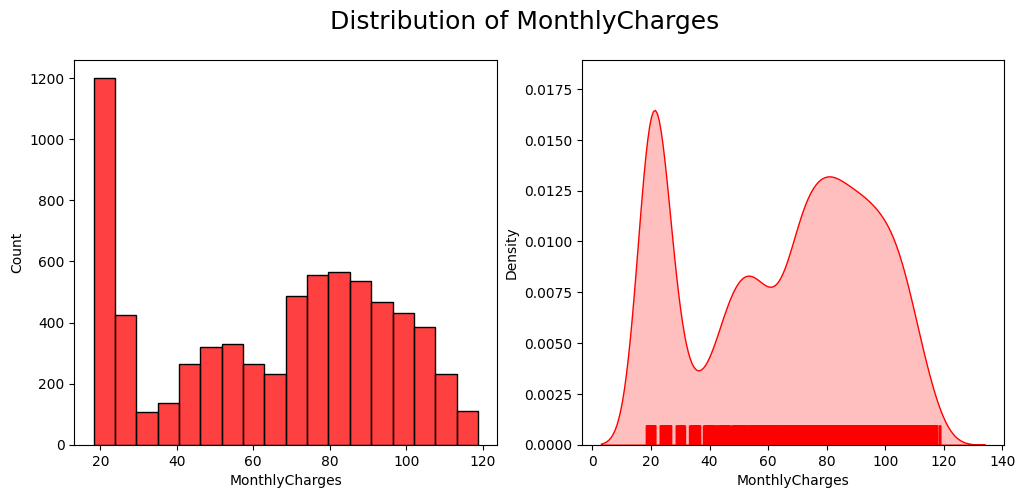

In [24]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(ds["MonthlyCharges"],ax=ax[0],color='Red')
sns.kdeplot(ds["MonthlyCharges"],fill=True,ax=ax[1],color='Red')
sns.rugplot(ds["MonthlyCharges"],height=0.05,color='Red')

fig.suptitle("Distribution of MonthlyCharges",size=18)

# Encoding categorical data

In [25]:
coder = LabelEncoder()
name = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "Churn"
]

for j in name:
  ds[j] = coder.fit_transform(ds[j])

In [26]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
X=ds.drop(columns=['Churn'])
y=ds['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [29]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6857,1,0,1,1,58,1,0,1,0,2,0,0,2,2,0,1,2,92.85,5305.05
4435,1,0,1,0,17,1,2,1,0,2,0,0,0,0,0,1,0,80.50,1336.90
6444,1,0,0,1,31,1,2,0,0,2,0,2,2,2,1,1,3,79.45,2587.70
4247,1,0,1,1,69,1,0,1,2,2,0,2,2,2,2,1,1,106.35,7261.75
2404,0,0,1,1,42,1,2,1,2,2,0,0,2,0,1,1,1,94.45,3923.80


In [30]:
y_train.head()

6857    0
4435    0
6444    1
4247    0
2404    0
Name: Churn, dtype: int64

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6857 to 2575
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   int64  
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   int64  
 3   Dependents        5282 non-null   int64  
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   int64  
 6   MultipleLines     5282 non-null   int64  
 7   InternetService   5282 non-null   int64  
 8   OnlineSecurity    5282 non-null   int64  
 9   OnlineBackup      5282 non-null   int64  
 10  DeviceProtection  5282 non-null   int64  
 11  TechSupport       5282 non-null   int64  
 12  StreamingTV       5282 non-null   int64  
 13  StreamingMovies   5282 non-null   int64  
 14  Contract          5282 non-null   int64  
 15  PaperlessBilling  5282 non-null   int64  
 16  PaymentMethod     5282 non-null   int64

# Splitting the dataset into the Training set and Test set

In [32]:
X_train['MonthlyCharges'] = X_train['MonthlyCharges'].astype(int)
X_train['TotalCharges'] = X_train['TotalCharges'].astype(int)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6857 to 2575
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5282 non-null   int64
 1   SeniorCitizen     5282 non-null   int64
 2   Partner           5282 non-null   int64
 3   Dependents        5282 non-null   int64
 4   tenure            5282 non-null   int64
 5   PhoneService      5282 non-null   int64
 6   MultipleLines     5282 non-null   int64
 7   InternetService   5282 non-null   int64
 8   OnlineSecurity    5282 non-null   int64
 9   OnlineBackup      5282 non-null   int64
 10  DeviceProtection  5282 non-null   int64
 11  TechSupport       5282 non-null   int64
 12  StreamingTV       5282 non-null   int64
 13  StreamingMovies   5282 non-null   int64
 14  Contract          5282 non-null   int64
 15  PaperlessBilling  5282 non-null   int64
 16  PaymentMethod     5282 non-null   int64
 17  MonthlyCharges    5282 non-nul

In [34]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6857,1,0,1,1,58,1,0,1,0,2,0,0,2,2,0,1,2,92,5305
4435,1,0,1,0,17,1,2,1,0,2,0,0,0,0,0,1,0,80,1336
6444,1,0,0,1,31,1,2,0,0,2,0,2,2,2,1,1,3,79,2587
4247,1,0,1,1,69,1,0,1,2,2,0,2,2,2,2,1,1,106,7261
2404,0,0,1,1,42,1,2,1,2,2,0,0,2,0,1,1,1,94,3923


In [35]:
y_train.isnull().sum()

0

# Feature Scaling

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set

In [37]:
# Initialize the SVC classifier
svm = SVC()

# Train the SVC classifier
svm.fit(X_train, y_train)

SVC()

# Predicting the Test set results

In [39]:
# Predict the labels for the test set
y_pred = svm.predict(X_test)

print(y_pred)

[0 0 0 ... 0 0 0]


# Making the Confusion Matrix

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Support Vector Machine - Accuracy: {accuracy*100:.4f}%")

[[1218  103]
 [ 239  201]]
Support Vector Machine - Accuracy: 80.5792%
